In [2]:
import math
# import pandas_datareader as web
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
pro = ts.pro_api()
df = pro.daily(ts_code='002456.SZ', start_date='20110101', end_date='20210120')
# df.head()

In [4]:
df.shape

(2375, 11)

In [5]:
df['trade_date'] = pd.to_datetime(df.trade_date, format='%Y%m%d')
df.index = df['trade_date']
df = df.sort_index()
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2011-01-04,002456.SZ,2011-01-04,68.50,69.60,68.01,69.27,69.19,0.08,0.1200,2981.76,2.050943e+04
2011-01-05,002456.SZ,2011-01-05,68.79,69.00,63.72,64.88,69.27,-4.39,-6.3400,10334.17,6.809743e+04
2011-01-06,002456.SZ,2011-01-06,64.84,65.30,63.73,64.46,64.88,-0.42,-0.6500,3389.53,2.179987e+04
2011-01-07,002456.SZ,2011-01-07,64.01,64.21,61.40,62.37,64.46,-2.09,-3.2400,6614.46,4.143742e+04
2011-01-10,002456.SZ,2011-01-10,61.62,63.60,60.80,61.59,62.37,-0.78,-1.2500,3724.24,2.307186e+04
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,002456.SZ,2021-01-14,14.51,14.83,14.27,14.28,14.52,-0.24,-1.6529,899025.46,1.303578e+06
2021-01-15,002456.SZ,2021-01-15,14.20,14.33,13.83,13.97,14.28,-0.31,-2.1709,624642.73,8.764084e+05
2021-01-18,002456.SZ,2021-01-18,13.92,14.36,13.86,14.30,13.97,0.33,2.3622,525262.39,7.475492e+05


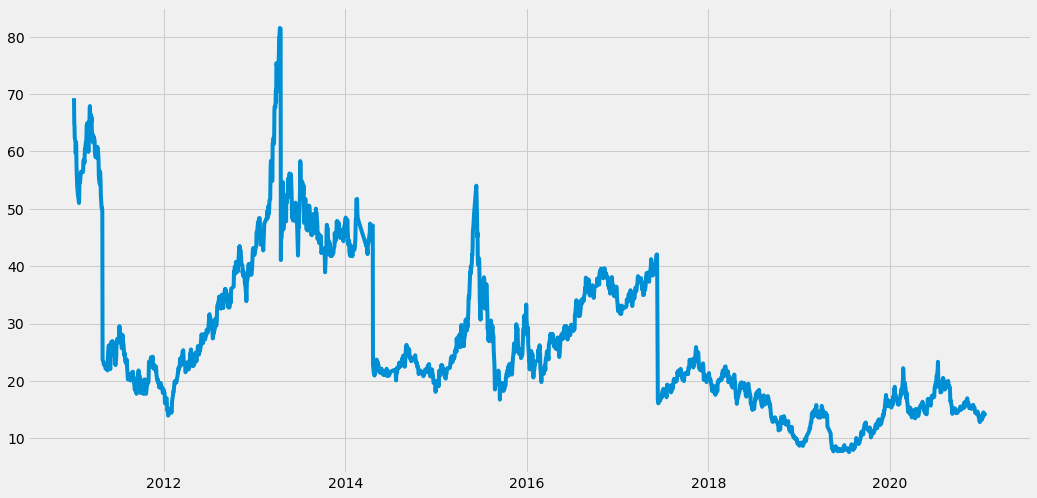

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

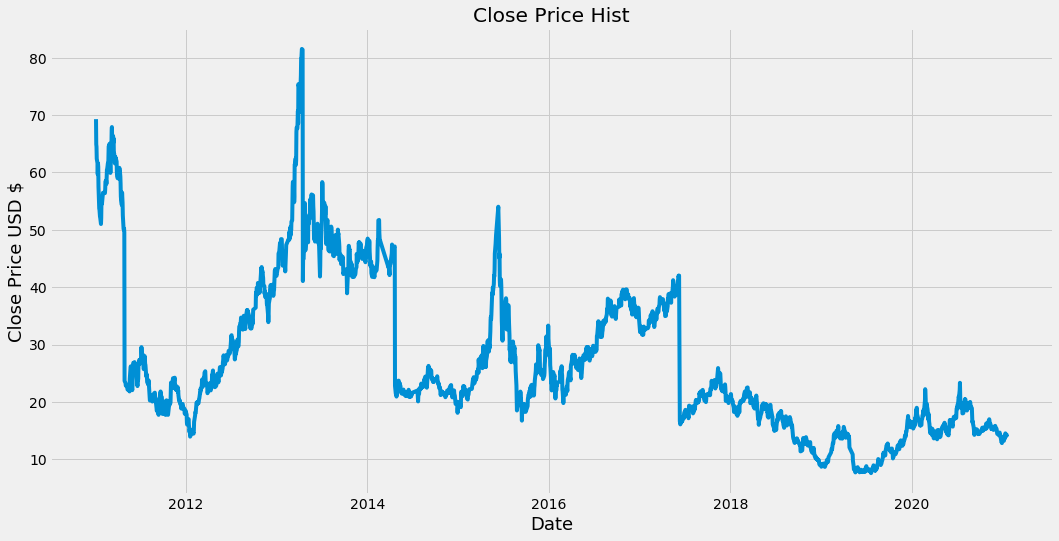

In [7]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [33]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
x_train, x_test = dataset[0:training_data_len], dataset[training_data_len:]
training_data_len
# type(dataset)
dataset

array([[69.27],
       [64.88],
       [64.46],
       ...,
       [14.3 ],
       [14.04],
       [13.92]])

In [31]:
# ?df['close'][0:training_data_len]
df['close'][training_data_len+1:]


trade_date
2019-01-31    10.01
2019-02-01    10.38
2019-02-11    11.20
2019-02-12    11.55
2019-02-13    11.81
              ...  
2021-01-14    14.28
2021-01-15    13.97
2021-01-18    14.30
2021-01-19    14.04
2021-01-20    13.92
Name: close, Length: 474, dtype: float64

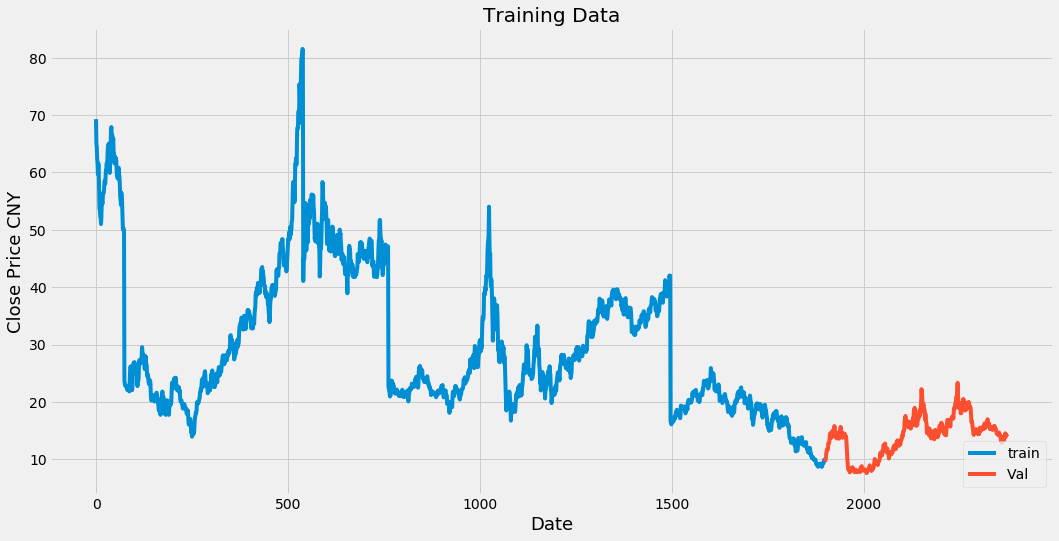

In [37]:
plt.figure(figsize=(16,8))
plt.title('Training Data')
plt.plot(x_train)
plt.plot([None for i in x_train] + [x for x in x_test])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price CNY', fontsize=18)
plt.legend(['train', 'Val'], loc='lower right')
plt.show()

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
# type(scaled_data)

numpy.ndarray

In [40]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

# ????
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.83450609, 0.77510149, 0.76941813, 0.74113667, 0.73058187,
       0.70433018, 0.73017591, 0.7217862 , 0.67537212, 0.62354533,
       0.62083897, 0.60487145, 0.60189445, 0.58728011, 0.60175913,
       0.64018945, 0.63937754, 0.63491204, 0.65656292, 0.6608931 ,
       0.66008119, 0.66887686, 0.68741543, 0.68998647, 0.68186739,
       0.69945873, 0.71556157, 0.71705007, 0.73058187, 0.71569689,
       0.74966171, 0.7699594 , 0.77185386, 0.7767253 , 0.74830853,
       0.73612991, 0.70771313, 0.76305819, 0.76941813, 0.80622463,
       0.81583221, 0.79093369, 0.79688769, 0.79364005, 0.77929635,
       0.78863329, 0.74830853, 0.75372124, 0.73017591, 0.73937754,
       0.74560217, 0.73152909, 0.74154263, 0.73450609, 0.70906631,
       0.69959405, 0.69526387, 0.69431664, 0.69566982, 0.71975643])]
[0.7063599458728009]

[array([0.83450609, 0.77510149, 0.76941813, 0.74113667, 0.73058187,
       0.70433018, 0.73017591, 0.7217862 , 0.67537212, 0.62354533,
       0.62083897, 0.60487145, 0.601

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1840, 60, 1)

In [42]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1840/1840 [==============================] - 35s 19ms/step - loss: 0.0033


In [44]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [45]:
x_test = np.array(x_test)

In [46]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.6861337635241057

C:\Users\JAYHAN02\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


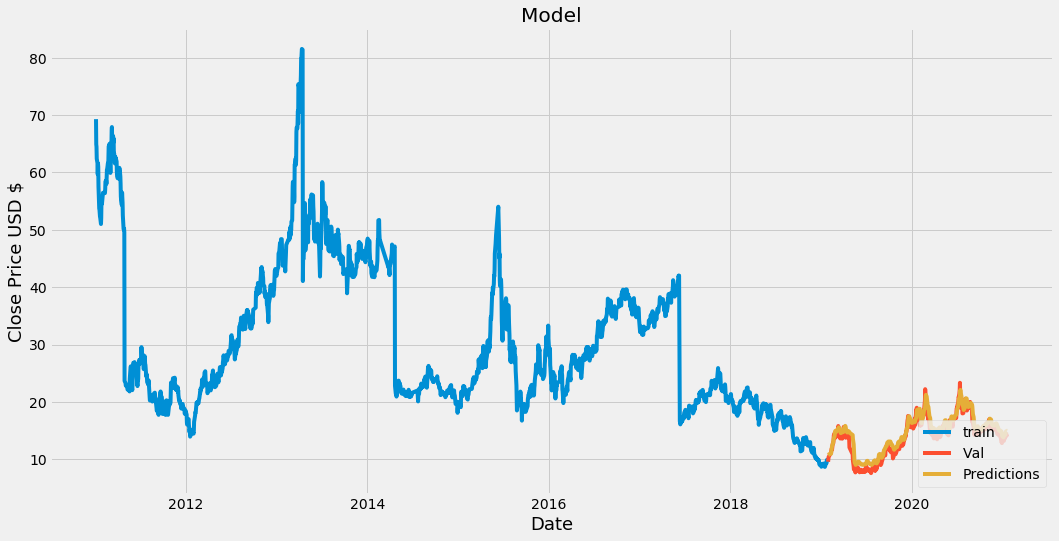

,close,Predictions
trade_date,,
2019-01-30,9.58,10.751024
2019-01-31,10.01,10.776256
2019-02-01,10.38,10.838030
2019-02-11,11.20,10.972087
2019-02-12,11.55,11.263387
...,...,...
2021-01-14,14.28,14.659610
2021-01-15,13.97,14.842186
2021-01-18,14.30,14.911173


In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['train', 'Val', 'Predictions'], loc='lower right')
plt.show()
valid[['close', 'Predictions']]

In [55]:
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
apple_quote = pro.daily(ts_code='002456.SZ', start_date='20100120', end_date='20210120')
new_df = apple_quote.filter(['close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
# apple_quote.head()

[[46.648083]]


In [53]:
# apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote2 = pro.daily(ts_code='002456.SZ', start_date='20210121', end_date='20210121')
# apple_quote2
print(apple_quote2['close'])

0    22.23
Name: close, dtype: float64
